In [1]:
# Loading packages
import os
import pandas as pd
import numpy as np

# Plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# 
from sklearn.cluster import KMeans

Load raw data

In [4]:
# Load raw data
raw = pd.read_csv('countryriskdata.csv')

# Check the dimensionality of the raw dataset and print the first 5 rows of data with column headers 
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


Simple exploratory analysis
Print summary statistics 
Note that all features have quite different variances, and Corruption and Legal are highly correlated. 

In [6]:
# Begin the analysis by checking some basic descriptive statistics 
print("\nSummary statistics\n", raw.describe().round(3))

# Print the correlation matrix to analyze between the four variables
print("\nCorrelation matrix\n")
raw_numeric = raw.iloc[:, -4:]
corr = raw_numeric.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)


Summary statistics
        Corruption    Peace    Legal  GDP Growth
count     122.000  122.000  122.000     122.000
mean       46.238    2.004    5.599       2.373
std        19.126    0.448    1.487       3.241
min        14.000    1.192    2.728     -18.000
25%        31.250    1.685    4.572       1.432
50%        40.000    1.969    5.274       2.496
75%        58.750    2.280    6.477       4.080
max        90.000    3.399    8.633       7.958

Correlation matrix



,Corruption,Peace,Legal,GDP Growth
Corruption,1.000,-0.700,0.924,0.103
Peace,-0.700,1.000,-0.652,-0.200
Legal,0.924,-0.652,1.000,0.123
GDP Growth,0.103,-0.200,0.123,1.000


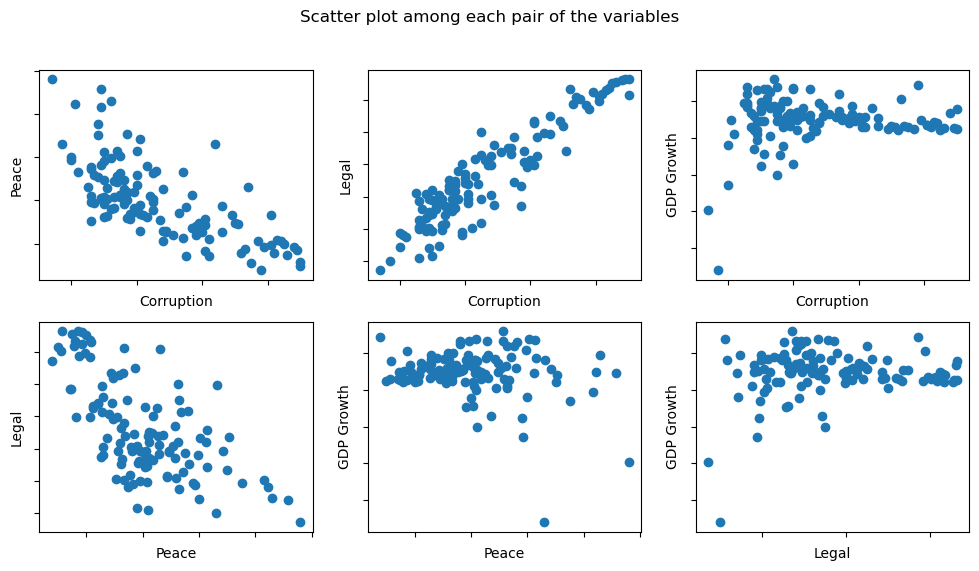

In [8]:
# Create a subplot of 2 rows and 3 columns of each pair of variables
fig, axs = plt.subplots(2, 3, figsize=(12,6))
fig.suptitle('Scatter plot among each pair of the variables')
Labels = ['Corruption', 'Peace', 'Legal', 'GDP Growth']

# Plot using a nested for loop that iterates through the combinations of the variables without repetition 
m = 0
for i in range(len(Labels)-1): 
    for j in range(1, len(Labels)-i):
        axs.flat[m].scatter(raw[Labels[i]], raw[Labels[i+j]]) # 
        axs.flat[m].set_xlabel(Labels[i]) #
        axs.flat[m].set_ylabel(Labels[i+j]) #
        # Turn off tick labels
        axs.flat[m].set_yticklabels([])
        axs.flat[m].set_xticklabels([])
        m = m+1

In [10]:
len(Labels)

4

Plot histogram
Note that the distribution for GDP growth is quite skewed. 

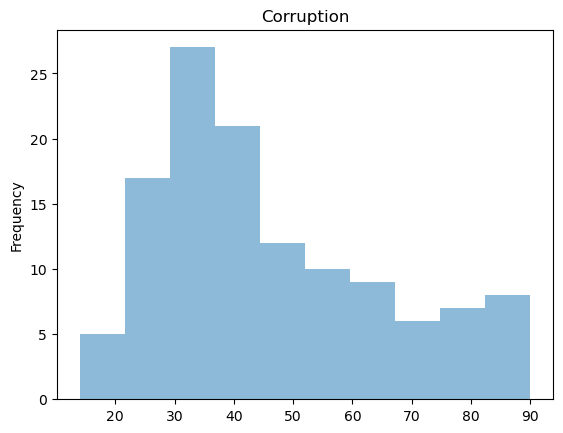

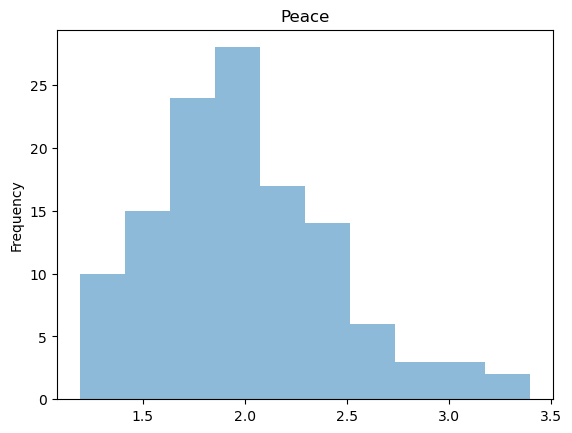

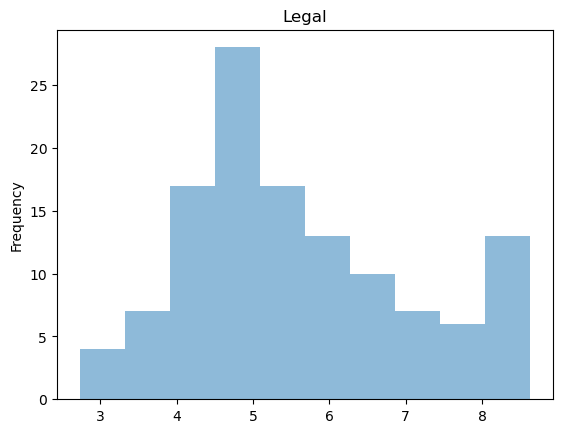

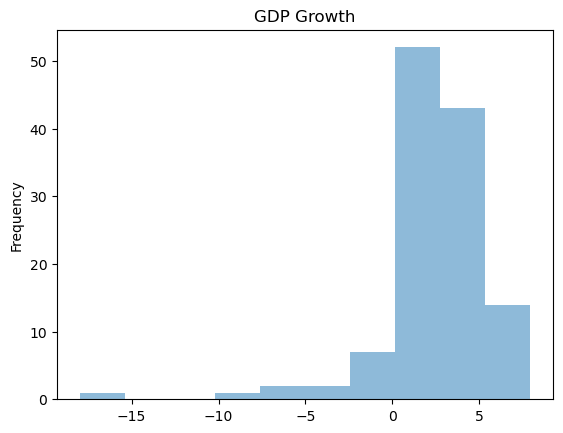

In [12]:
# Plot 4 histograms for each variable 
plt.figure(1)
raw['Corruption'].plot(kind='hist', title='Corruption', alpha = 0.5)

plt.figure(2)
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3)
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4)
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

K-means cluster  
Pick features and normalization
Let's normalize all the features, effectively making them equally weighted. 
Ref: Feature normalization (https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering) 

In [15]:
X = raw[['Corruption', 'Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

   Corruption     Peace     Legal  GDP Growth
0   -0.378414 -0.305319 -1.194666    0.317896
1   -0.639833  0.467304 -0.967413    0.564392
2   -0.535266 -0.104348 -0.693096   -1.440899
3   -0.692117  0.478469 -0.990273   -0.667782
4    1.712936 -1.202990  1.778450    0.030368


Perform elbow method  
The marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though)
Ref: Determining the number of clusters in a dataset. (https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

K-mean with k = 3

In [20]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X)

# Print the inertia (sum of squared distances from each point to its assigned cluster center) that measures how compact the clusters are
print("inertia for k=3 is", np.round(kmeans.inertia_,3))

Cluster_Table = pd.DataFrame(data=kmeans.cluster_centers_, columns=['Corruption', 'Peace', 'Legal', 'GDP Growth'])
Cluster_Table['Cluster'] = Cluster_Table.index
print("\ncluster centers:\n")
print(Cluster_Table.to_string(index=False))

# Assign cluster label (0,1,2) to the raw data
raw['Cluster Labels']=kmeans.labels_
pd.set_option("display.max_rows", None) # Show all rows in the dataframe 
raw

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


inertia for k=3 is 189.708

cluster centers:

 Corruption     Peace     Legal  GDP Growth  Cluster
   1.226295 -0.975165  1.161167    0.010228        0
  -1.023248  1.346664 -1.054684   -1.712920        1
  -0.477600  0.262228 -0.433313    0.371984        2


,Country,Abbrev,Corruption,Peace,Legal,GDP Growth,Cluster Labels
0,Albania,AL,39,1.867,3.822,3.403,2
1,Algeria,DZ,34,2.213,4.160,4.202,2
2,Argentina,AR,36,1.957,4.568,-2.298,1
3,Armenia,AM,33,2.218,4.126,0.208,2
4,Australia,AU,79,1.465,8.244,2.471,0
5,Austria,AT,75,1.278,8.012,1.482,0
6,Azerbaijan,AZ,30,2.450,3.946,-3.772,1
7,Bahrain,BH,43,2.398,6.157,2.915,2
8,Bangladesh,BD,26,2.045,3.117,6.923,2
9,Belgium,BE,77,1.528,7.839,1.239,0


For the cluster centers, it appears that cluster 0 contains the countries with lowest risk, cluster 2 contains countries with medium risk and cluster 1 contains countries with highest risk

Visualize the result (2D plots)

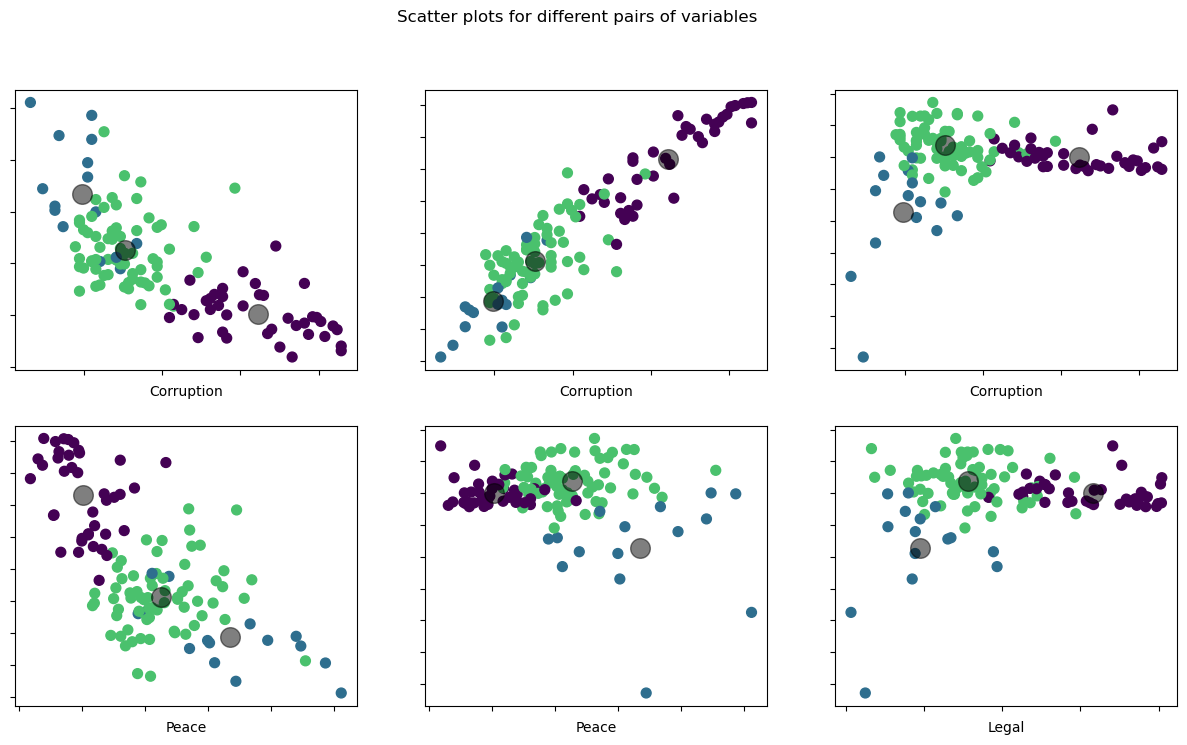

In [24]:
# Scatter plots of different pairs of variables
fig, axs = plt.subplots(2,3,figsize=(15,8))
fig.suptitle('Scatter plots for different pairs of variables')
Labels = ['Corruption', 'Peace', 'Legal', 'GDP Growth']
y = kmeans.labels_

# Colour the datapoint for visualization and ensure properly scaled colour by normalizing
norm = clrs.Normalize(vmin=0, vmax=y.max()+0.8)
cmap = cm.viridis 

# Plot the Figure
m = 0
for i in range(len(Labels)-1): 
    for j in range(1,len(Labels)-i):
        axs.flat[m].scatter(X[Labels[i]], X[Labels[i+j]], c=cmap(norm(y)), s=50)
        axs.flat[m].scatter(Cluster_Table[Labels[i]], Cluster_Table[Labels[i+j]], c='black', s=200, alpha=0.5)
        axs.flat[m].set_xlabel(Labels[i])
        axs.flat[m].set_yticklabels([])
        axs.flat[m].set_xticklabels([])
        m = m+1

Visualize the result (2D plots with names of countries)
plot country abbreviations instead of dots

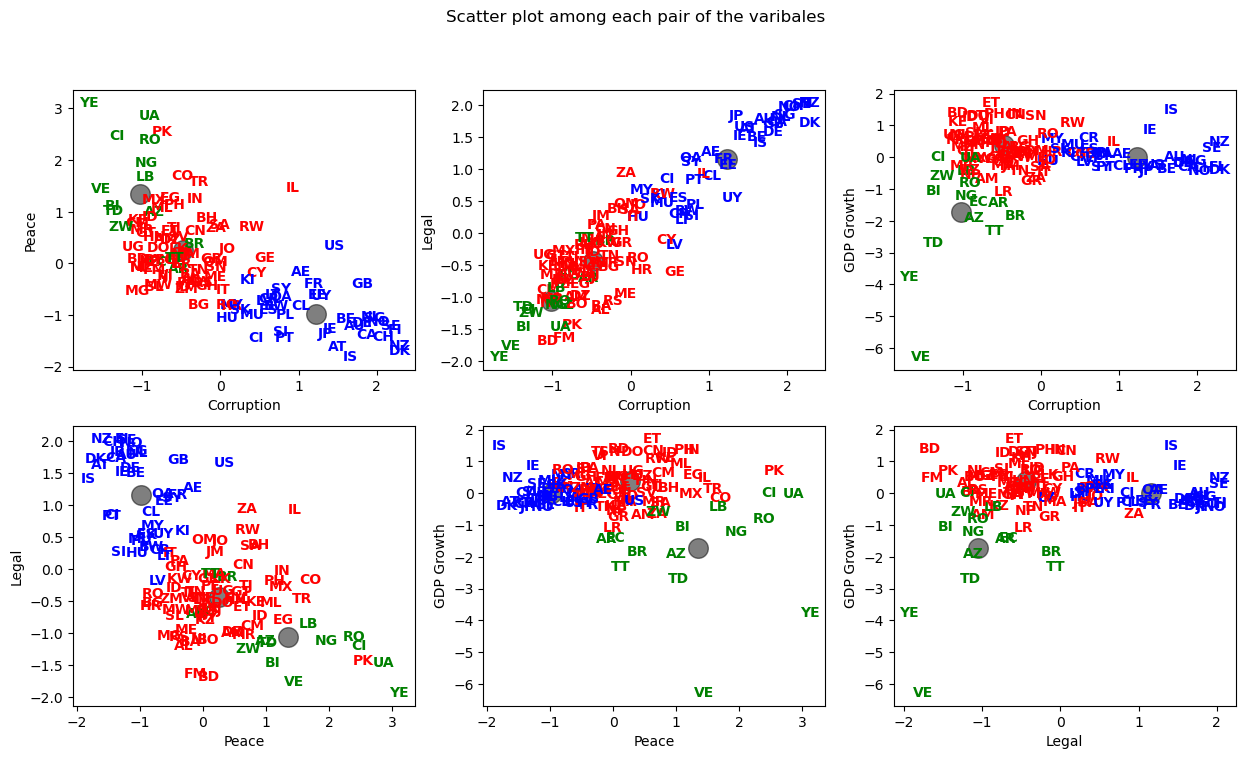

In [30]:
# Plot of the Scatter Figure among each pair
fig, axs = plt.subplots(2,3,figsize=(15,8))
fig.suptitle('Scatter plot among each pair of the varibales')
Labels = ['Corruption', 'Peace', 'Legal', 'GDP Growth']
colors = ['blue', 'green', 'red']

# set up the color
norm = clrs.Normalize(vmin=0, vmax=y.max()+0.8)
cmap = cm.viridis

# Create a visualization that shows pairwise relationships between all unique pairs of variables in the dataset
m = 0 
for i in range(len(Labels)-1): 
    for j in range(1, len(Labels)-i): 
        axs.flat[m].scatter(X[Labels[i]],X[Labels[i+j]],c=y, s=0, alpha=0)
        axs.flat[m].scatter(Cluster_Table[Labels[i]], Cluster_Table[Labels[i+j]], c='black', s=200, alpha=0.5)
        axs.flat[m].set_xlabel(Labels[i])
        axs.flat[m].set_ylabel(Labels[i+j])
        for h in range(X.shape[0]): 
            axs.flat[m].text(X[Labels[i]].iloc[h], X[Labels[i+j]].iloc[h], raw['Abbrev'].iloc[h],
                color=colors[y[h]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
        m = m+1                            

List the result

In [41]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values(by=['Label','Country']))

                          Country Abbrev  Label
0                         Albania     AL      0
1                         Algeria     DZ      0
7                         Bahrain     BH      0
8                      Bangladesh     BD      0
10                          Benin     BJ      0
11                        Bolivia     BO      0
12         Bosnia and Herzegovina     BA      0
15                       Bulgaria     BG      0
17                       Cameroon     CM      0
21                          China     CN      0
22                       Colombia     CO      0
24                        Croatia     HR      0
25                         Cyprus     CY      0
29             Dominican Republic     DO      0
31                          Egypt     EG      0
32                    El Salvador     SV      0
34                       Ethiopia     ET      0
37                          Gabon     GA      0
38                        Georgia     GE      0
40                          Ghana     GH

Since the Corruption and Legal are highly correlated, we drop the Corruption variable, i.e. we pick three features for this analysis, Peace, Legal, and GDP Growth

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

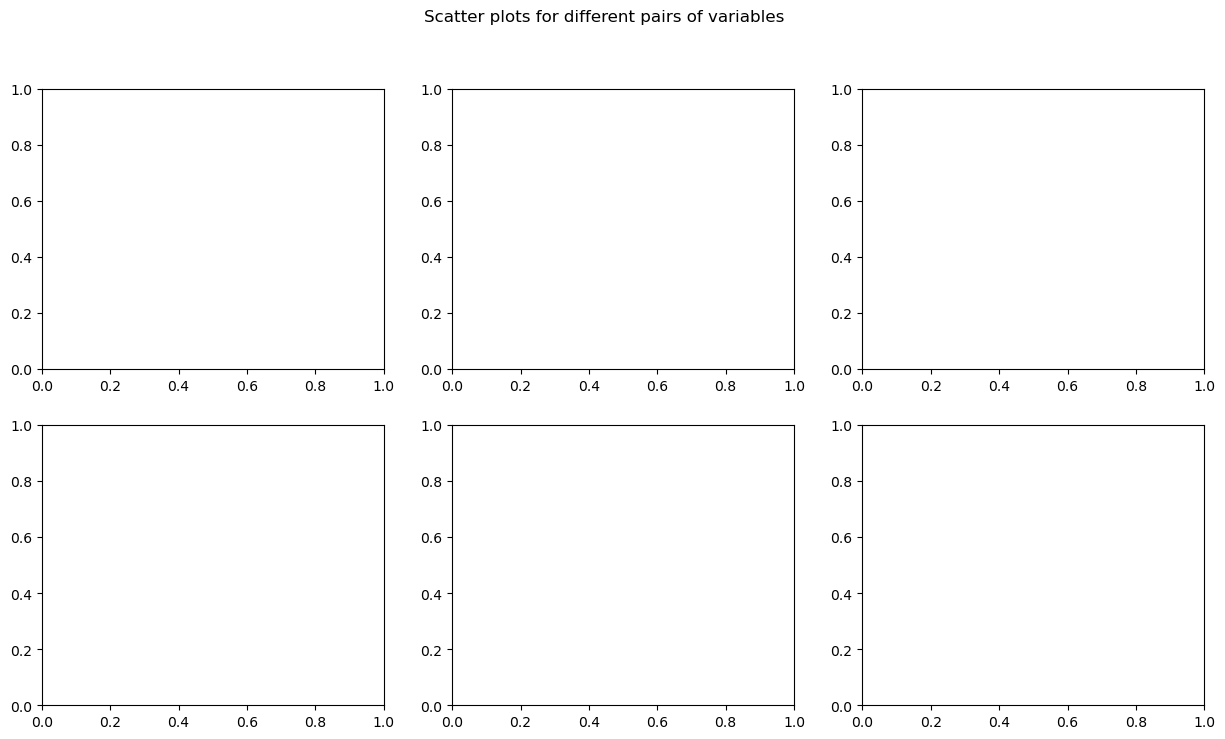

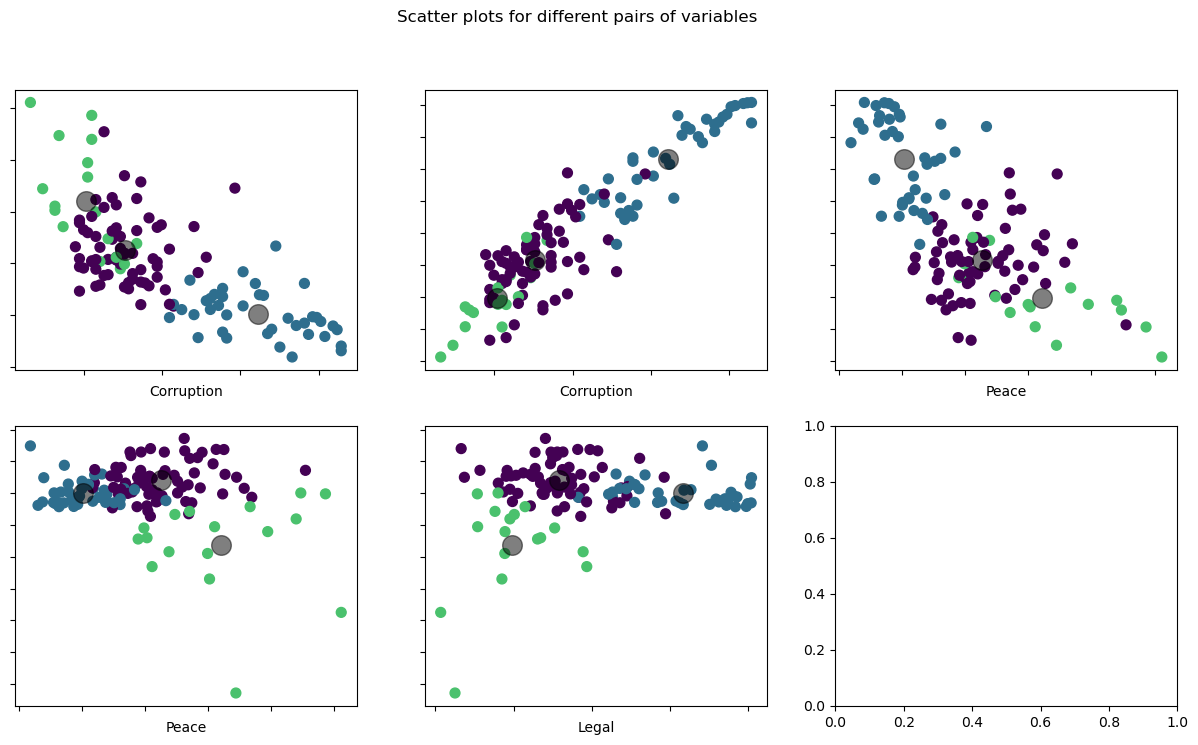

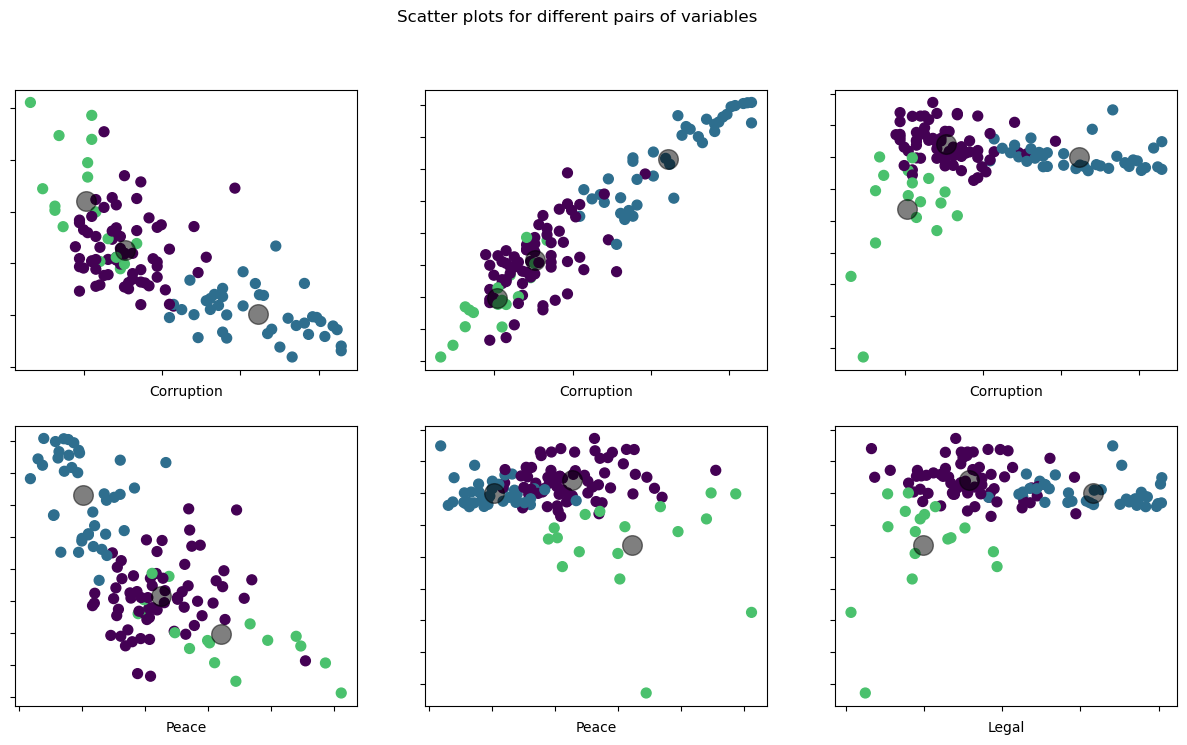

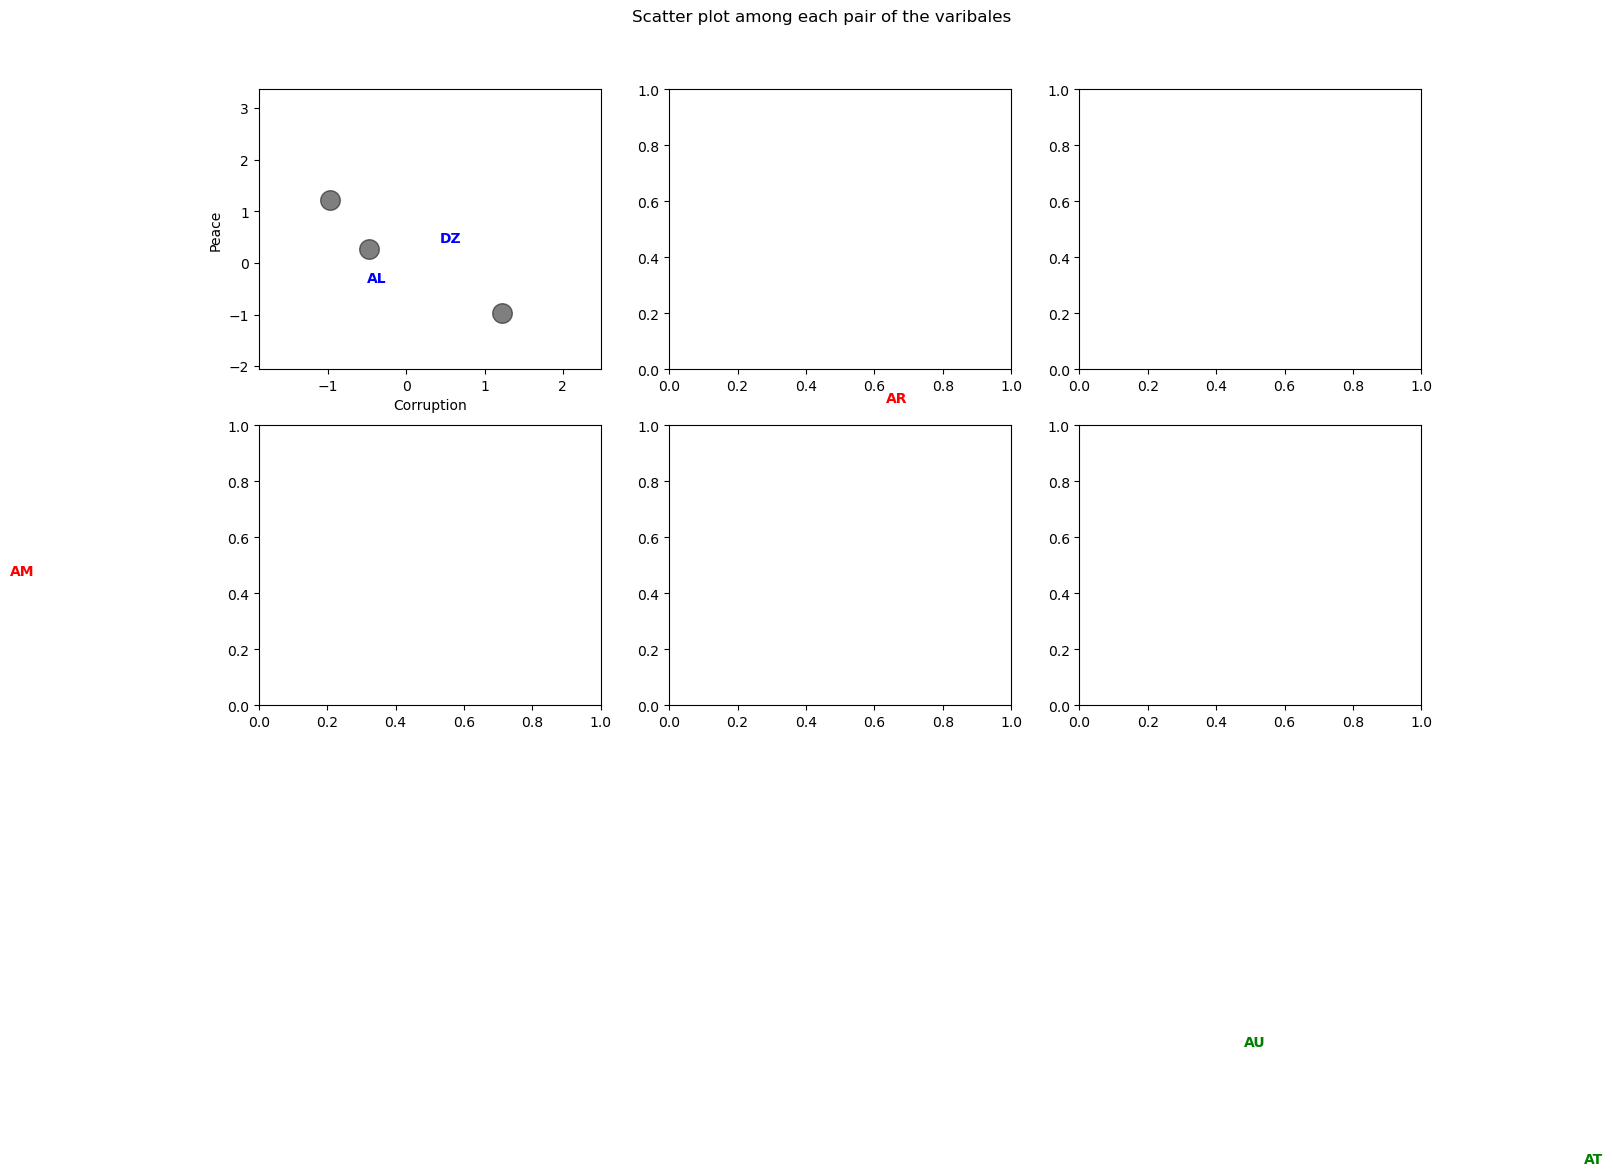

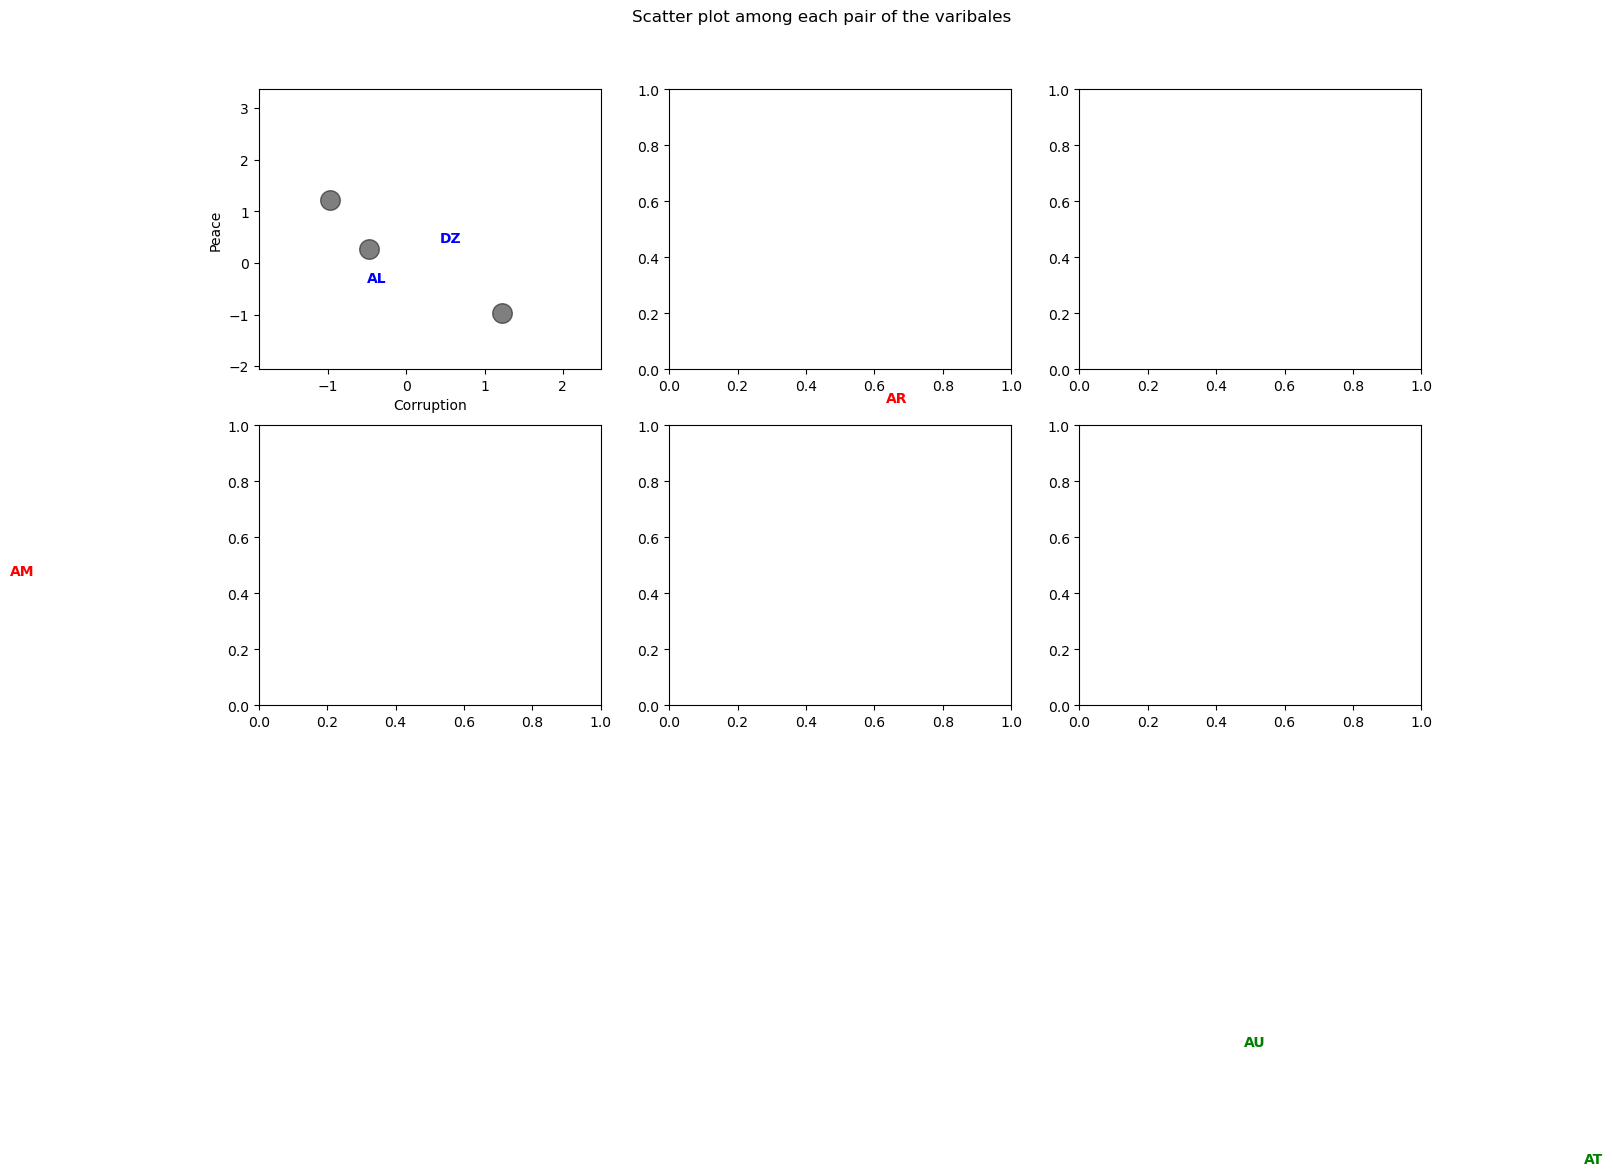

<Figure size 640x480 with 0 Axes>

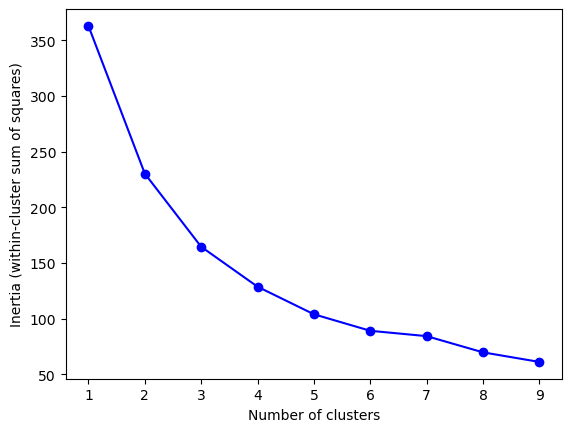

In [47]:
X = X[['Peace', 'Legal', 'GDP Growth']]
Ks = range(1,10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

K-means with k=3

In [54]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(X)

# print inertia and cluster center
print("inertia for k=3 is", np.round(kmeans.inertia_,3))

Cluster_Table = pd.DataFrame(data=kmeans.cluster_centers_, columns=['Peace', 'Legal', 'GDP Growth'])
Cluster_Table['Cluster'] = Cluster_Table.index
print("\ncluster centers:\n")
print(Cluster_Table.to_string(index=False))

# Assign cluster label (0,1,2) to the raw data
raw['Cluster Labels']=kmeans.labels_
pd.set_option("display.max_rows", None) # Show all rows in the dataframe 
raw

inertia for k=3 is 157.551

cluster centers:

    Peace     Legal  GDP Growth  Cluster
 0.253209 -0.451868    0.431274        0
-0.928106  1.166413   -0.014458        1
 1.215626 -1.016771   -1.614970        2


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Country,Abbrev,Corruption,Peace,Legal,GDP Growth,Cluster Labels
0,Albania,AL,39,1.867,3.822,3.403,0
1,Algeria,DZ,34,2.213,4.160,4.202,0
2,Argentina,AR,36,1.957,4.568,-2.298,2
3,Armenia,AM,33,2.218,4.126,0.208,2
4,Australia,AU,79,1.465,8.244,2.471,1
5,Austria,AT,75,1.278,8.012,1.482,1
6,Azerbaijan,AZ,30,2.450,3.946,-3.772,2
7,Bahrain,BH,43,2.398,6.157,2.915,0
8,Bangladesh,BD,26,2.045,3.117,6.923,0
9,Belgium,BE,77,1.528,7.839,1.239,1


It appears that Cluster 1 contains the countries with lowest risk, Cluster 0 contains the countries with medium risk, and Cluster 2 contains the countries with highest risk

Visualize the result (2D plots)

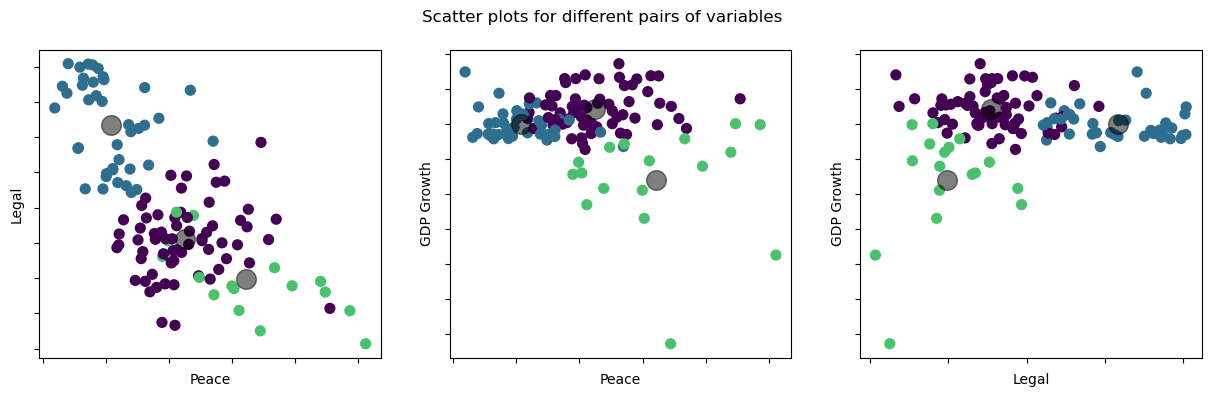

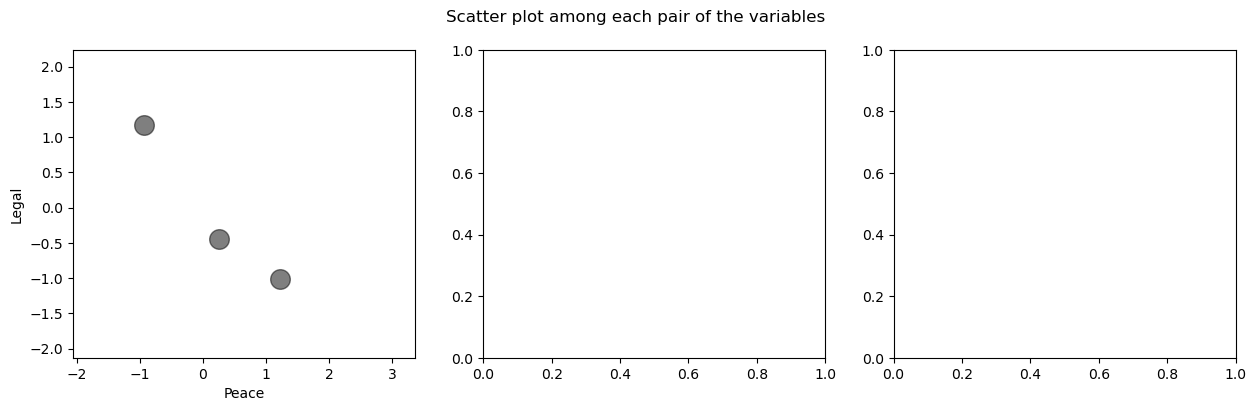

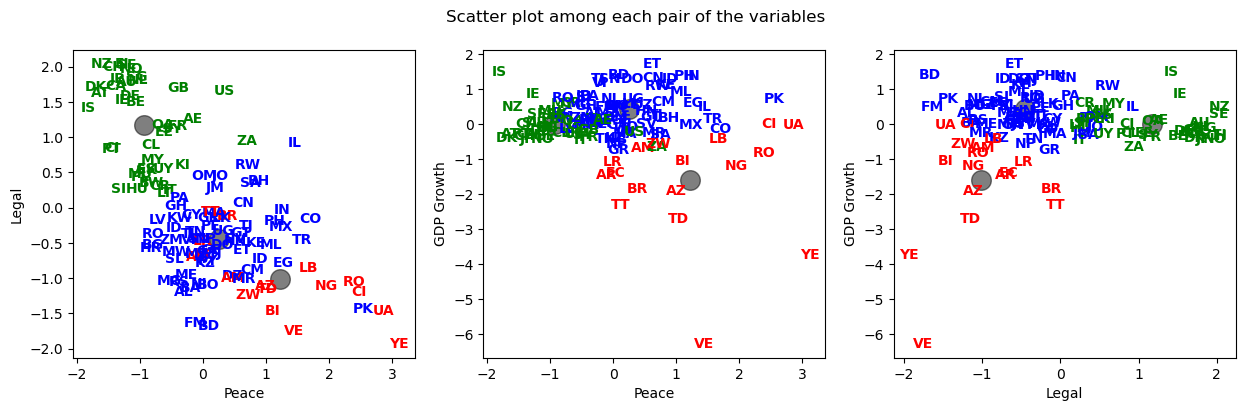

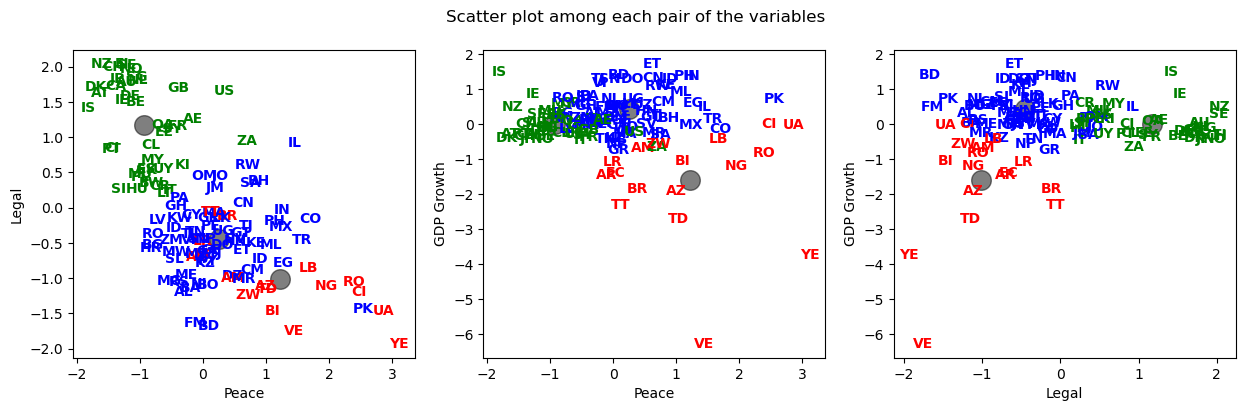

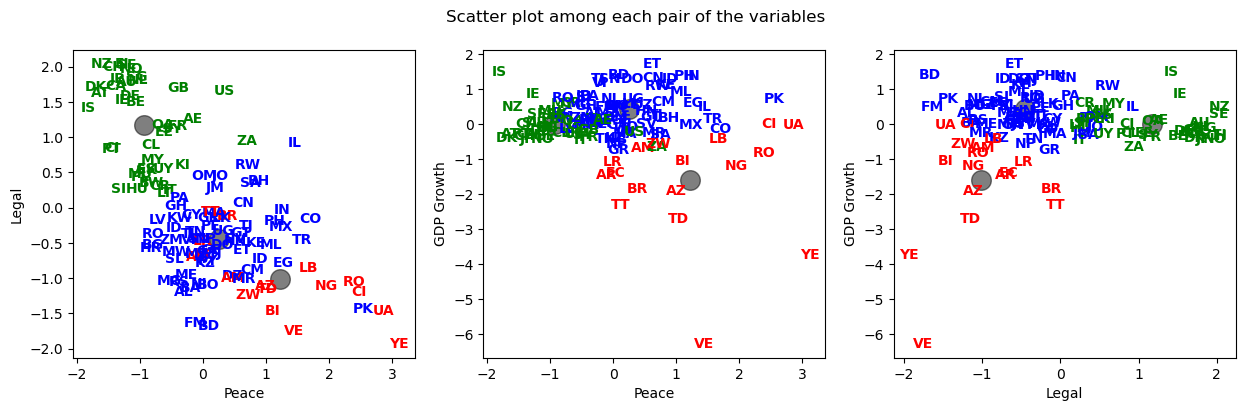

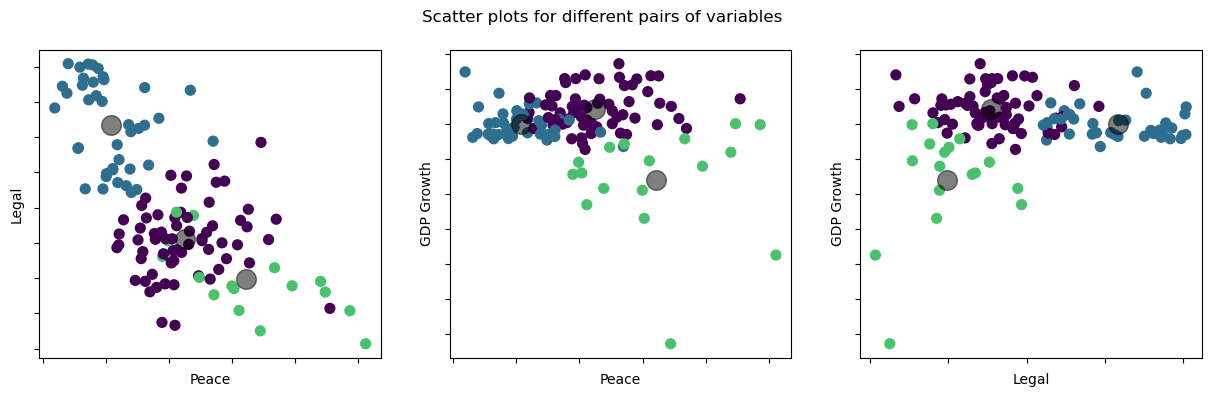

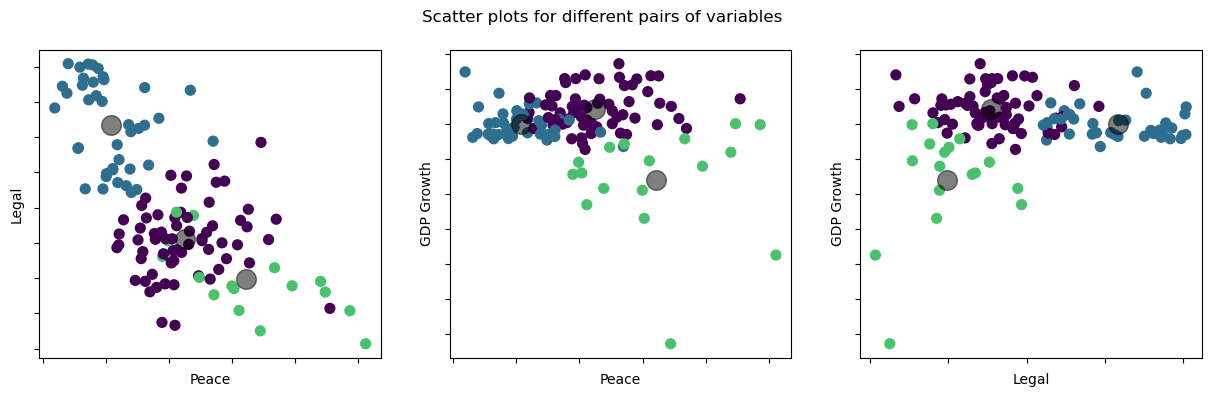

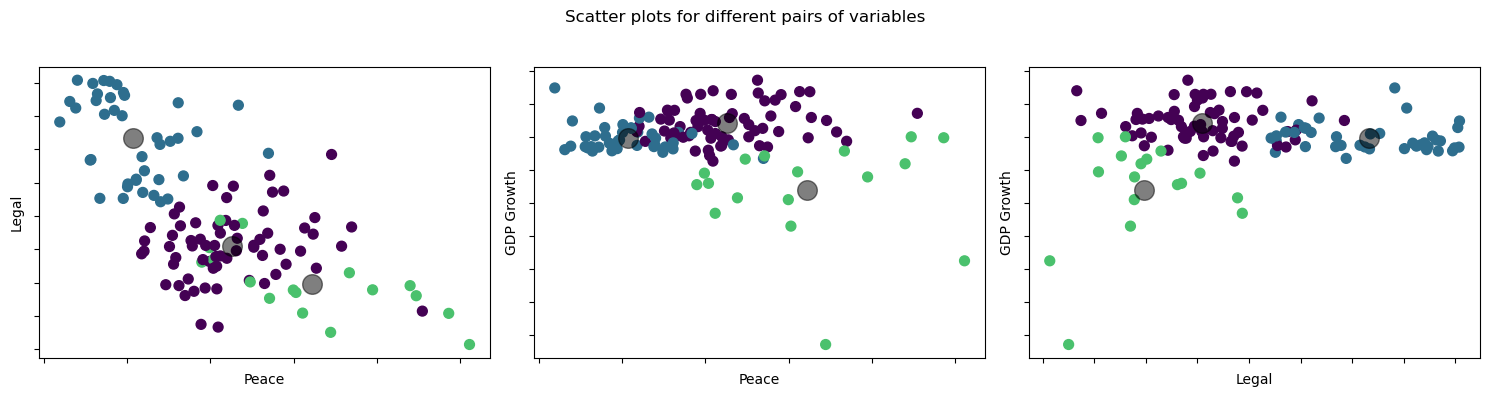

In [78]:
# Scatter plots of different pairs of variables
fig, axs = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Scatter plots for different pairs of variables')
Labels = ['Peace','Legal','GDP Growth']
y = kmeans.labels_

# set up the color
norm = clrs.Normalize(vmin=0,vmax=y.max()+0.8)
cmap = cm.viridis

# Plot the Figure
m = 0 
for i in range(len(Labels)-1):
    for j in range(1,len(Labels)-i):
        axs.flat[m].scatter(X[Labels[i]], X[Labels[i+j]], c=cmap(norm(y)), s=50)
        axs.flat[m].scatter(Cluster_Table[Labels[i]], Cluster_Table[Labels[i+j]], c='black', s=200, alpha=0.5)
        axs.flat[m].set_xlabel(Labels[i])
        axs.flat[m].set_ylabel(Labels[i+j])
        # Turn off tick labels
        axs.flat[m].set_yticklabels([])
        axs.flat[m].set_xticklabels([])
        m = m+1

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with the title
plt.show()

Visualize the result (2D plots with names of countries)  
plot country abbrevations instead of dots

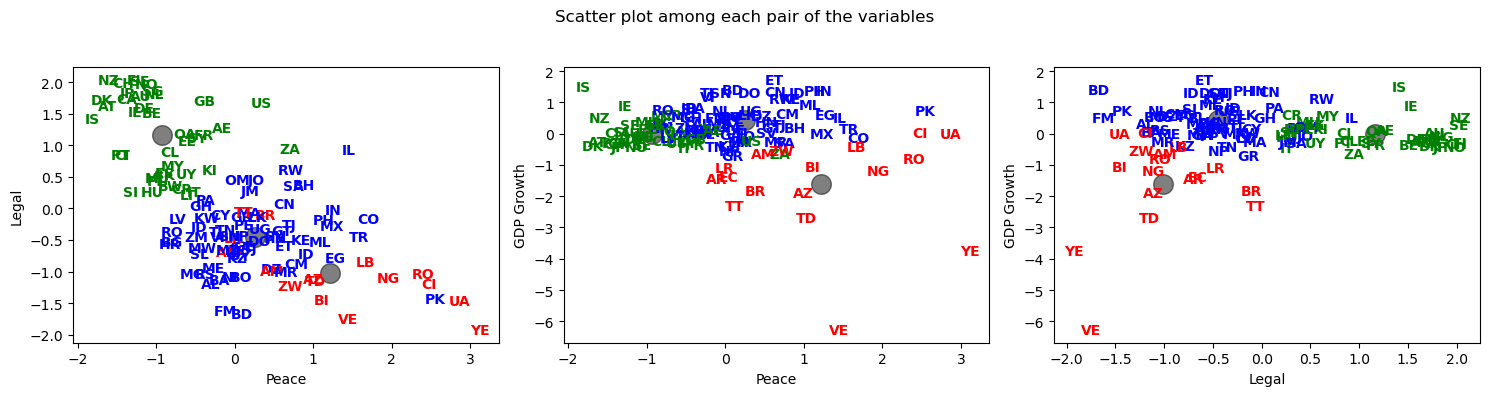

In [80]:
# Plot of the Scatter Figure among each pair
fig,axs = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Scatter plot among each pair of the variables')
Labels=['Peace', 'Legal', 'GDP Growth']
colors = ['blue', 'green', 'red']

# set up the color
norm = clrs.Normalize(vmin=0,vmax=y.max()+0.8)
cmap = cm.viridis

# Plot the Figure
m = 0 
for i in range(len(Labels)-1):
    for j in range(1,len(Labels)-i):
        axs.flat[m].scatter(X[Labels[i]], X[Labels[i+j]], c=y, s=0, alpha=0)
        axs.flat[m].scatter(Cluster_Table[Labels[i]], Cluster_Table[Labels[i+j]], c='black', s=200, alpha=0.5)
        axs.flat[m].set_xlabel(Labels[i])
        axs.flat[m].set_ylabel(Labels[i+j])
        for h in range(X.shape[0]): 
            axs.flat[m].text(X[Labels[i]].iloc[h], X[Labels[i+j]].iloc[h], raw['Abbrev'].iloc[h], color=colors[y[h]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center')
        m = m+1

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Prevent overlap with the title
plt.show()

Visualize the result (3D plot)

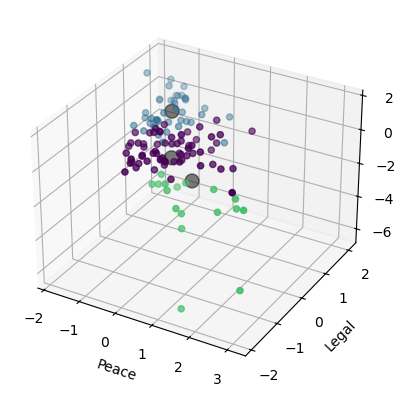

In [83]:
# set up the color
norm = clrs.Normalize(vmin=0, vmax=y.max()+0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha = 0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

List the result

In [88]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values(by=['Label','Country']))

                          Country Abbrev  Label
0                         Albania     AL      0
1                         Algeria     DZ      0
7                         Bahrain     BH      0
8                      Bangladesh     BD      0
10                          Benin     BJ      0
11                        Bolivia     BO      0
12         Bosnia and Herzegovina     BA      0
15                       Bulgaria     BG      0
17                       Cameroon     CM      0
21                          China     CN      0
22                       Colombia     CO      0
24                        Croatia     HR      0
25                         Cyprus     CY      0
29             Dominican Republic     DO      0
31                          Egypt     EG      0
32                    El Salvador     SV      0
34                       Ethiopia     ET      0
37                          Gabon     GA      0
38                        Georgia     GE      0
40                          Ghana     GH